In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd

In [ ]:
# Load the XML file
tree = ET.parse('CMT01.xml')
root = tree.getroot()

In [ ]:
# Extract the node and edge data from the XML file
node_list = []
demand_list = []
for node in root.findall("./network/nodes/"):
    node_id = int(node.attrib['id'])
    node_type = int(node.attrib['type'])
    node_x = float(node.find('cx').text)
    node_y = float(node.find('cy').text)
    node_list.append([node_id, node_type, node_x, node_y])
for demand in root.findall("./requests/"):
    node_id = int(demand.attrib['node'])
    node_demand = float(demand.find('quantity').text)
    demand_list.append([node_id, node_demand])

In [ ]:
# Convert the node_list and edge_list into dataframes
node_df = pd.DataFrame(node_list, columns=["id", "type", "x", "y"])
demand_df = pd.DataFrame(demand_list, columns=["id", "demand"])

In [ ]:
# Extract the x and y coordinates as a numpy array
coords = node_df[['x', 'y']].to_numpy()

In [ ]:
coord = list(zip(node_df['x'], node_df['y']))

In [ ]:
coord

[(37.0, 52.0),
 (49.0, 49.0),
 (52.0, 64.0),
 (20.0, 26.0),
 (40.0, 30.0),
 (21.0, 47.0),
 (17.0, 63.0),
 (31.0, 62.0),
 (52.0, 33.0),
 (51.0, 21.0),
 (42.0, 41.0),
 (31.0, 32.0),
 (5.0, 25.0),
 (12.0, 42.0),
 (36.0, 16.0),
 (52.0, 41.0),
 (27.0, 23.0),
 (17.0, 33.0),
 (13.0, 13.0),
 (57.0, 58.0),
 (62.0, 42.0),
 (42.0, 57.0),
 (16.0, 57.0),
 (8.0, 52.0),
 (7.0, 38.0),
 (27.0, 68.0),
 (30.0, 48.0),
 (43.0, 67.0),
 (58.0, 48.0),
 (58.0, 27.0),
 (37.0, 69.0),
 (38.0, 46.0),
 (46.0, 10.0),
 (61.0, 33.0),
 (62.0, 63.0),
 (63.0, 69.0),
 (32.0, 22.0),
 (45.0, 35.0),
 (59.0, 15.0),
 (5.0, 6.0),
 (10.0, 17.0),
 (21.0, 10.0),
 (5.0, 64.0),
 (30.0, 15.0),
 (39.0, 10.0),
 (32.0, 39.0),
 (25.0, 32.0),
 (25.0, 55.0),
 (48.0, 28.0),
 (56.0, 37.0),
 (30.0, 40.0)]

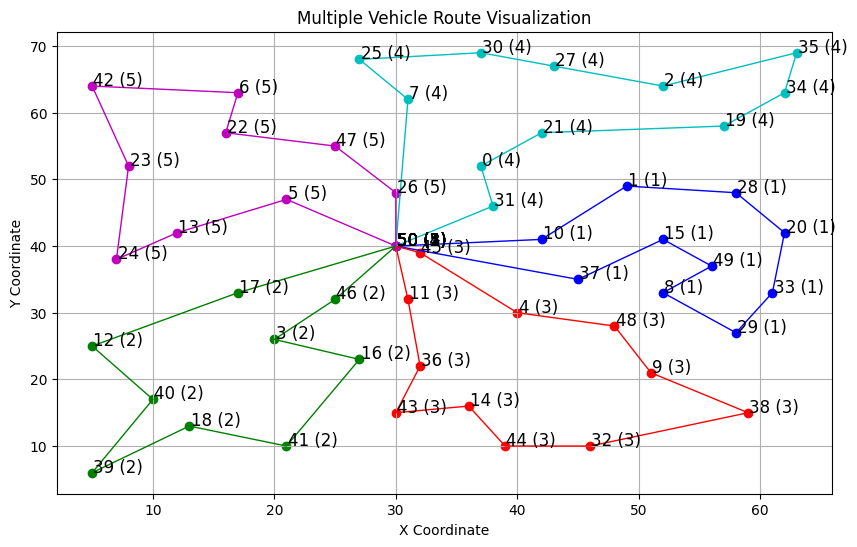

In [ ]:
import matplotlib.pyplot as plt
import itertools

def visualize_route(ax, coordinates, route, color, vehicle_id):
    route_coordinates = [coordinates[point] for point in route]

    x_values, y_values = zip(*route_coordinates)

    ax.scatter(x_values, y_values, c=color, marker='o')
    ax.plot(x_values, y_values, c=color, linestyle='-', linewidth=1)

    for i, coord in enumerate(route_coordinates):
        ax.annotate(f'{route[i]} ({vehicle_id})', (coord[0] + 0.1, coord[1] + 0.1), fontsize=12)


def visualize_multiple_routes(coordinates, routes):
    colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k'])

    plt.figure(figsize=(10, 6))
    ax = plt.gca()

    for vehicle_id, route in enumerate(routes, start=1):
        visualize_route(ax, coordinates, route, next(colors), vehicle_id)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Multiple Vehicle Route Visualization')

    plt.grid()
    plt.show()


# Example input
coordinates = coord
routes = [[50, 10, 1, 28, 20, 33, 29, 8, 49, 15, 37, 50], [50, 46, 3, 16, 41, 18, 39, 40, 12, 17, 50], [50, 11, 36, 43, 14, 44, 32, 38, 9, 48, 4, 45, 50], [50, 31, 0, 21, 19, 34, 35, 2, 27, 30, 25, 7, 50], [50, 26, 47, 22, 6, 42, 23, 24, 13, 5, 50]]

visualize_multiple_routes(coordinates, routes)
